<a href="https://colab.research.google.com/github/scspx/Bank-customer-churn-prediction/blob/main/Colab_Strategic_Thinking_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary



<table>
    <thead>
        <tr>
            <th>Dataframe</th>        
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>churn</td>
            <td>Original dataframe created</td>
        <tr>
            <td>churn_drop</td>
            <td>Dataframe created to drop non relevant columns</td>
        <tr>
            <td>churn_ren</td>
            <td>Dataframe created to rename columns</td>

# Exploratory Data Analysis - EDA

In order to conduct EDA first step needed is to import the required libraries:

Pandas is used to clean the data, manipulate into tables and process it. It handles data load by reading from various sources; <br>
Seaborn library is used for data visualisation; <br>
Matplot is used for data visualisation; <br>
%matplotlib inline is used to format the visualisations.

By importing the libraries with a short name allows us to save typing the full name of the library every time we need to call it in a function.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

By running the code below the data from the dataset is uploaded into the dataframe using Pandas Library. A dataframe object is created transfering semi structured data (in this case a csv file) into a structured type of data.

pd.read_csv works for any data file that is a csv type using Pandas library by giving an address where the data is.

In [4]:
url = 'https://drive.google.com/file/d/1qNVNvd0N7UsbwlWpODX1-r_XB4-FWkJ-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
churn = pd.read_csv(path)

To check how many columns and observations are in this dataset we can use .shape function. The first number shows the number of rows or observations and the second one shows the total number of columns within the dataset. This dataset as we can see has 10,000 observations and 14 columns.

In [5]:
churn.shape

(10000, 14)

Now to read the data we need to call the dataframe created "churn" and the function .head to see what is available within this dataset. Changing the argument in between brackets allows us to add the number of rows we want to see. If we do not add a number between brackets by default the function will show the top 5 rows within the dataset (all indexes start with zero).

In [6]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .info is another function to check the data. The first column is the index for each feature we have, the second column shows the variables and the third column gives the data type, if it is an object means the data is text, float64 is a decimal number and int64 when it is whole number.

It is useful information in order to start preparing the data. As per below, we can see this dataset has 3 features that are text (object) therefore qualitative data; 9 features that contain whole numbers (int64) and 2 features with decimal numbers (float64) which means quantitative data. Also shows there are no null values and gives how much memory is being used in the computer.

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Dropping irrelevant columns

As seem above this dataset contains 14 features, however not all of them are relavant to this project as not all of them affect the customer churn. Analysing the dataset we can see variables as "RowNumber", "CustomerId" and "Surname" have no effect on customer leaving the bank, threfore these 3 comuns will be removed below by using .drop function. Also a new dataframe will be created in order to keep the original "churn" dataset with the original 14 features.

In [8]:
churn_drop = churn.drop(["RowNumber","CustomerId","Surname"],axis=1)    

In [9]:
churn_drop.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


All the remaining columns can influence the customer churn in some way, threfore we will keep them.

## Renaming columns

Few columns were renamed by using function .rename as follows. 

In [35]:
churn_ren = churn_drop.rename(columns={"CreditScore":"Credit_Score",
                                       "Balance":"Acc_Balance",
                                       "NumOfProducts":"Num_of_Products",
                                       "HasCrCard":"Credit_Card", 
                                       "IsActiveMember":"Active_Member",
                                       "EstimatedSalary":"Estimated_Salary"})

By running .head again we can confirm below columns have been renamed.

In [11]:
churn_ren.head()

,Credit_Score,Geography,Gender,Age,Tenure,Acc_Balance,Num_of_Products,Credit_Card,Active_Member,Estimated_Salary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Identifying duplicates and missing values

Identifying duplicates and missing data are important steps of data preparation to clean the data and reduce bias.

### Duplicates

As we can see, running the .duplicate function below the first number shows the number of duplicates equals zero and the second column shows the total number of columns equals 11, therefore there is no duplicate data within this dataframe.

In [12]:
churn_ren[churn_ren.duplicated()]
print("Number of duplicate rows: ", churn_ren.shape)

Number of duplicate rows:  (10000, 11)


### Missing values

One of the most important goals of EDA is to identify missing values within the dataset. As previous demonstrated by the function .info this dataset has null values, however another way of exploring if the dataset has missing values is running the code below, the output false immediately tells us there is no missing data.

In [13]:
churn_ren.isnull().values.any()

False

We can also check the missing values for all the dataset by using .sum, it shows the variable name in the first column followed by the total number of missing values in the second column. Therefore we can confirm below there are no missing values in any feature of this dataset.

In [14]:
churn_ren.isnull().sum()

Credit_Score        0
Geography           0
Gender              0
Age                 0
Tenure              0
Acc_Balance         0
Num_of_Products     0
Credit_Card         0
Active_Member       0
Estimated_Salary    0
Exited              0
dtype: int64

## Quantitative data

To discover the statistical information within the dataset we can use the function .describe. This method includes the 5 Number Summary, the summary includes the descriptive statistics of the dataset by calculating the number of entries, mean (average of values), standard deviation (average of the distance between each value and the mean), minimum value, first quartile (25% of the data), median (middle value of the data), third quartile (75% of the data) and maximum value for each one of the quantitative variables, the numerical ones. The 5 Number Summary only works for quantitative data, therefore we can note variable class is not represented below as it has qualitative data which is text.

In [15]:
churn_ren.describe()

,Credit_Score,Age,Tenure,Acc_Balance,Num_of_Products,Credit_Card,Active_Member,Estimated_Salary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Below the seaborn library and the function sns.boxplot were used to build a Box-Plot of the variable Ternure and Credit Score. It shows how the values are spread for this variable by demonstrating the 5 number summary: minimum score, first quartile, median, third quartile and maximum score. Also confirms the presence of outliers for the variable Credit Score.

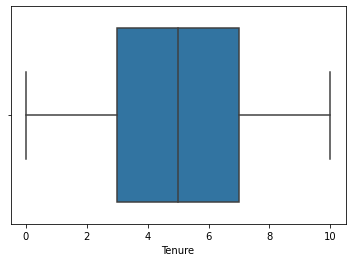

In [16]:
sns.boxplot(x=churn_ren["Tenure"])

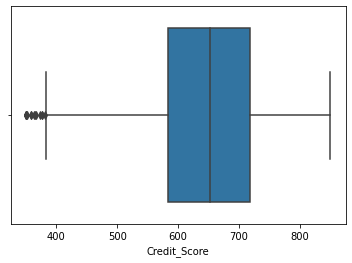

In [17]:
sns.boxplot(x=churn_ren["Credit_Score"])

## Second Semester

We can see that the Exited feature is unbalanced, with an approximation of 20.4% to the positive response and 79.6% negative, this could cause us problems in the application of our models for churn prediction.
The methods and techniques that we will perform to solve this are: Resampling (Oversampling and Undersampling) and Ensembling Methods (Ensemble of Sampler).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


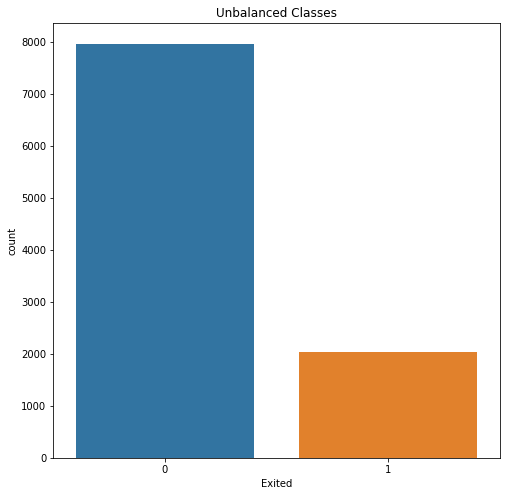

In [22]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Exited', data=churn_ren)
plt.title('Unbalanced Classes')
plt.show()

## 1.1  Undersampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


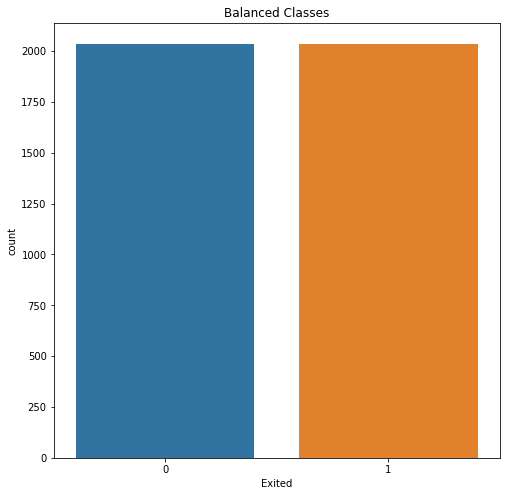

In [23]:

# Shuffle the Dataset.
churn_shuff = churn_ren.sample(frac=1,random_state=4)

# Put all the churn class in a separate dataset.
churn_df = churn_shuff.loc[churn_shuff['Exited'] == 1]

#Randomly select 2037 observations from the non-churn (majority class)
non_churn_df = churn_shuff.loc[churn_shuff['Exited'] == 0].sample(n=2037,random_state=42)

# Concatenate both dataframes again
undersampling_df = pd.concat([churn_df, non_churn_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Exited', data=undersampling_df)
plt.title('Balanced Classes')
plt.show()

## 1.2 Oversampling (SMOTE)

In [36]:
churn_ren["Geography"] = churn_ren["Geography"].str.replace('France', '0')
churn_ren["Geography"] = churn_ren["Geography"].str.replace('Spain', '1')
churn_ren["Geography"] = churn_ren["Geography"].str.replace('Germany', '2')
churn_ren["Geography"] = pd.to_numeric(churn_ren["Geography"])

churn_ren["Gender"] = churn_ren["Gender"].str.replace('Male', '0')
churn_ren["Gender"] = churn_ren["Gender"].str.replace('Female', '1')

churn_ren["Gender"] = pd.to_numeric(churn_ren["Gender"])

In [37]:
churn_ren.head()

,Credit_Score,Geography,Gender,Age,Tenure,Acc_Balance,Num_of_Products,Credit_Card,Active_Member,Estimated_Salary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [46]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(churn_ren.drop('Exited', axis=1), churn_ren['Exited'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


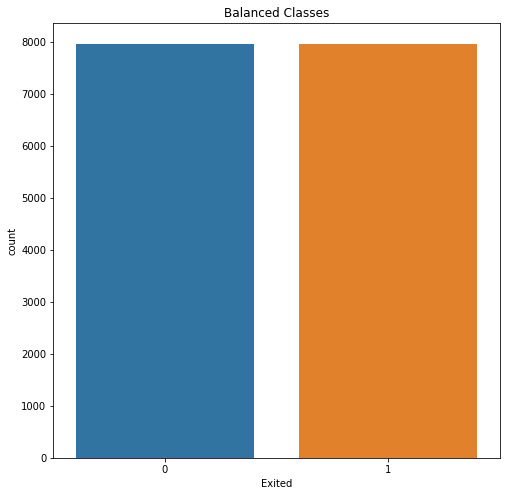

In [47]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Exited', data=oversampled_train)
plt.title('Balanced Classes')
plt.show()

## 2 Ensembling Methods (Ensemble of Sampler)

In [61]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0,
                                max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, verbose=0, sampler=None)

y_train = churn_ren['Exited']
X_train = churn_ren.drop(['Exited'], axis=1, inplace=False)

#Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)

AttributeError: ignored